In [1]:
# Package imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

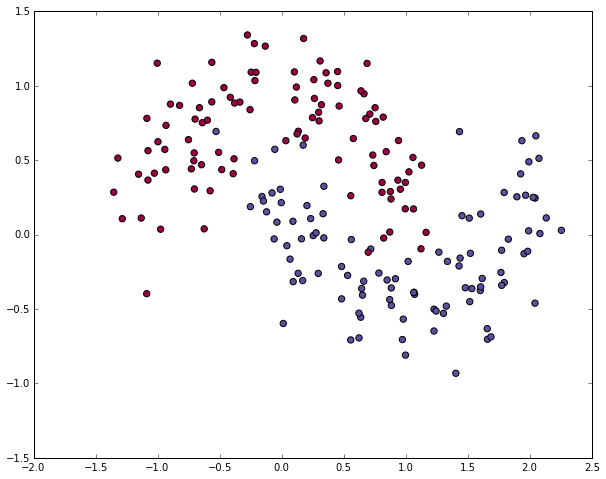

In [2]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
y = y.reshape(len(y), 1)

In [3]:
print X.shape
print y.shape

(200, 2)
(200, 1)


In [ ]:



# def predict(X, w1, b1, w2, b2):
#     z1 = np.dot(X, w1) + b1
#     a1 = np.tanh(z1)
#     z2 = np.dot(a1, w2) + b2
#     exp_scores = np.exp(z2)
#     probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
#     return np.argmax(probs, axis=1)



# def calculate_loss(X, y, w1, b1, w2, b2, reg_lambda):
#     z1 = np.dot(X, w1) + b1
#     a1 = np.tanh(z1)
#     z2 = np.dot(a1, w2) + b2
#     exp_scores = np.exp(z2)
#     probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
#     correct_logprobs = -np.log(probs[range(m), y.ravel()])
#     data_loss = np.sum(correct_logprobs)
    
#     reg = (reg_lambda/2) * (np.sum(np.square(w1)) + np.sum(np.square(w2)))
#     return 1./m * (data_loss + reg)



# def compute_gradient(X, y, w1, b1, w2, b2, reg_lambda):
#     # Forward propagation
#     z1 = np.dot(X, w1) + b1
#     a1 = np.tanh(z1)
#     z2 = np.dot(a1, w2) + b2
#     exp_scores = np.exp(z2)
#     probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
#     # Backpropagation
#     delta3 = probs
#     delta3[range(m), y.ravel()] -= 1

#     delta2 = np.dot(delta3, w2.T) * (1 - np.power(a1, 2))

#     dw1 = np.dot(X.T, delta2) + reg_lambda * w1
#     db1 = np.sum(delta2, axis=0, keepdims=True)
    
#     dw2 = np.dot(a1.T, delta3) + reg_lambda * w2
#     db2 = np.sum(delta3, axis=0, keepdims=True)
    
#     return dw1, db1, dw2, db2



In [87]:

def predict_2(X, thetas):
    a = X
    thetas_len = len(thetas)
    for i, theta in enumerate(thetas):
        b = theta[0:1]
        w = theta[1:]
        z = np.dot(a, w) + b

        if i < thetas_len-1:
            a = np.tanh(z)
        else:
            exp_scores = np.exp(z)
            a = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
#     print 'a', a
    return np.argmax(a, axis=1)

def calculate_loss_2(X, y, thetas, reg_lambda):
    m = X.shape[0]
    a = X
    thetas_len = len(thetas)

    for i, theta in enumerate(thetas):
        b = theta[0:1]
        w = theta[1:]
        z = np.dot(a, w) + b

        if i < thetas_len-1:
            a = np.tanh(z)
        else:
            exp_scores = np.exp(z)
            a = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    correct_logprobs = -np.log(a[range(m), y.ravel()])
    data_loss = np.sum(correct_logprobs)
    
    weights_sum = 0
    for theta in thetas:
        w = theta[1:]
        w_sq = np.square(w)
        w_sq_sum = w_sq.sum()
        weights_sum += w_sq_sum
    reg = (reg_lambda/2) * weights_sum
    return 1./m * (data_loss + reg)



def compute_gradient_2(X, y, thetas, reg_lambda):
    m = X.shape[0]
    a = X
    thetas_len = len(thetas)

    activations = [X]
    
    for i, theta in enumerate(thetas):
        b = theta[0:1]
        w = theta[1:]
        z = np.dot(a, w) + b

        if i < thetas_len-1:
            a = np.tanh(z)
        else:
            exp_scores = np.exp(z)
            a = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        activations.append(a)

    deltas = [None] * thetas_len
    
    for i in range(thetas_len-1,-1,-1):
        if i == thetas_len-1:
            delta = activations[i+1]
            delta[range(m), y.ravel()] -= 1
        else:
            next_delta = deltas[i+1]
            next_theta = thetas[i+1]
            next_w = next_theta[1:]
            a = activations[i+1]
            delta = np.dot(next_delta, next_w.T) * (1 - np.power(a, 2))
        deltas[i] = delta
    
    thetas_grad = []
    for i in range(len(deltas)):
        delta = deltas[i]
        theta = thetas[i]
        w = theta[1:]
        a = activations[i]
        
        b_grad = np.sum(delta, axis=0, keepdims=True)
        w_grad = np.dot(a.T, delta) + reg_lambda * w
        theta_grad = np.vstack((b_grad, w_grad))
        thetas_grad.append(theta_grad)
    
    return thetas_grad


def gradient_descent(X, y, reg_lambda, alpha, layers, num_iters):    
    
    rand = np.random.RandomState(12)
    
    thetas = []
    for i in range(len(layers)-1):
    
        mm = layers[i]
        nn = layers[i+1]
        theta = rand.rand(mm+1, nn) / np.sqrt(mm)
        theta[0] = 0
        thetas.append(theta)
    
    costs = []
    for i in range(num_iters):
        
        if i % 1 == 0:
            cost = calculate_loss_2(X, y, thetas, reg_lambda)
            costs.append(cost)
        
        thetas_grad = compute_gradient_2(X, y, thetas, reg_lambda)
    
        for i, theta_grad in enumerate(thetas_grad):
            thetas[i] -= alpha * theta_grad

    return thetas, costs


def do_prediction(X, y, thetas):
    m = X.shape[0]
    predicted = predict_2(X, thetas).reshape(m,1)
    n_correct = (predicted == y).sum()
    percent_correct = float(n_correct) / m
    return percent_correct


In [51]:

# m = X.shape[0]
# n = np.unique(y).size

alpha = 0.001
reg_lambda = 0.001

layers = [2,4,6,2]
num_iters = 10

thetas, costs = gradient_descent(X, y, reg_lambda, alpha, layers, num_iters)

print do_prediction(thetas)
    
plt.plot(costs)


ValueError: matrices are not aligned

In [13]:
df = pd.read_csv('../mnist/mnist_train.csv')


In [91]:
matrix = df.as_matrix()[:10000]
m = matrix.shape[0]
y = matrix[:,0:1]
X = matrix[:,1:]

def feature_normalize(X):
    mean = np.mean(X)
    std = np.std(X, ddof=1)
    return ( X - mean ) / std

X = feature_normalize(X)

print X.shape
print y.shape

(10000, 784)
(10000, 1)


0.9188


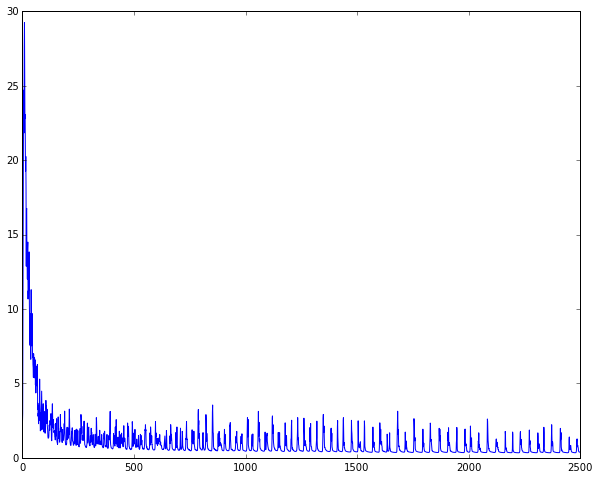

In [94]:
alpha = 0.001
reg_lambda = 0.001

layers = [784,12,10]
num_iters = 2500

thetas, costs = gradient_descent(X, y, reg_lambda, alpha, layers, num_iters)

print do_prediction(X, y, thetas)
    
plt.plot(costs)

In [81]:
test = pd.read_csv('../mnist/mnist_test.csv', header=None)

In [84]:
matrix_test = test.as_matrix()
X_test = matrix_test[:,1:]
m_test = X_test.shape[0]
y_test = matrix_test[:,0:1]
X_test = feature_normalize(X_test)

print X_test.shape
print y_test.shape

(10000, 784)
(10000, 1)


In [95]:
print do_prediction(X_test, y_test, thetas)

0.8491
